In [3]:
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [7]:
data = pd.read_csv("/Users/JaeYoung/Downloads/student/student-mat.csv", sep=";")

In [9]:
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [10]:
data = data[["G1","G2","G3","studytime","failures","absences"]] #원하는거만 뽑아내기!!!

In [12]:
data.head(3)

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10


In [16]:
predict = "G3"

X = np.array(data.drop([predict], 1)) #G3만 빼내고 저장
Y = np.array(data[predict]) #G3만 저장

In [20]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.1)

In [21]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train) # fit this data to find best line
acc = linear.score(x_test, y_test) # accuracy of our model
acc #이거 그 linear한거랑 같이 적으면 되겠다. 직접하는 거랑 sklearn바로 이용하는거!!

0.7556884994342753

In [23]:
linear.coef_ #Coefficient y=Mx+b에서 M임!!!!

array([ 0.1291862 ,  0.99219012, -0.07885655, -0.29189863,  0.03136232])

In [24]:
linear.intercept_ #Intercept

-1.4895500313278678

In [25]:
predictions = linear.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

14.757296054940769 [13 15  4  0  0] 15
12.644541714913723 [13 12  1  0 20] 12
5.1968062480148935 [ 6  6  2  1 13] 8
12.8517723717097 [13 13  3  0  0] 13
7.766556739623354 [ 9  8  2  0 10] 8
6.123514503092848 [7 7 3 0 0] 8
7.479657446986607 [ 8  8  4  0 10] 8
15.487004724127788 [15 15  2  0 10] 15
8.029038186323914 [7 9 4 0 0] 0
18.615465519391265 [18 18  3  0  5] 19
8.1867512834121 [7 9 2 0 0] 8
17.823844301300582 [17 17  2  0 13] 17
8.153225047021095 [9 9 2 1 0] 0
8.55160561800561 [8 9 1 0 5] 9
9.7080811706898 [10 10  1  0  2] 10
14.148927602550994 [15 14  4  0  4] 14
7.323747363073084 [8 8 2 0 0] 0
-0.8218163081202107 [7 0 3 0 0] 0
10.781061745094691 [11 11  4  0  8] 10
8.416596772969601 [10  9  4  0  0] 0
8.570572946909909 [9 9 2 0 4] 10
11.597472941577118 [10 12  3  0  4] 12
6.852332893031923 [6 8 1 1 0] 8
15.090788071434106 [14 15  3  0  4] 16
-0.8721459551246804 [6 0 2 0 0] 0
4.818294512522009 [8 6 2 2 2] 5
16.47427369711525 [18 16  3  0  0] 16
-0.7932894065805881 [6 0 1 0 0] 0
1

In [28]:
import pickle
from matplotlib import style

In [29]:
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f) #pickle로 모델을 저장!!!!(다시 매번 만들필요없이)

pickle_in = open("studentmodel.pickle","rb")
linear = pickle.load(pickle_in)

In [32]:
best = 0
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.1)
for _ in range(30):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.1)
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train) # fit this data to find best line
    acc = linear.score(x_test, y_test) # accuracy of our model
    print(acc)
    if acc > best:
        best = acc
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)

0.8236825086400429
0.9188182879938791
0.8749635423311135
0.8006787761852637
0.8266726573787855
0.8606914532995569
0.8855418603834405
0.9085878581730189
0.867561222965955
0.7959632826466093
0.6537751429398119
0.7613908542636202
0.7990302692304252
0.7958588102834361
0.7584166945585575
0.9044549326724687
0.8512020582346514
0.7663922642652897
0.8502049521173316
0.7144159433513784
0.7864400553744078
0.7943200900012413
0.8902564404229847
0.6351914120653659
0.8976683339750889
0.8463752568164411
0.8123512867619848
0.8944601212208971
0.9296290054624903
0.778862008518002


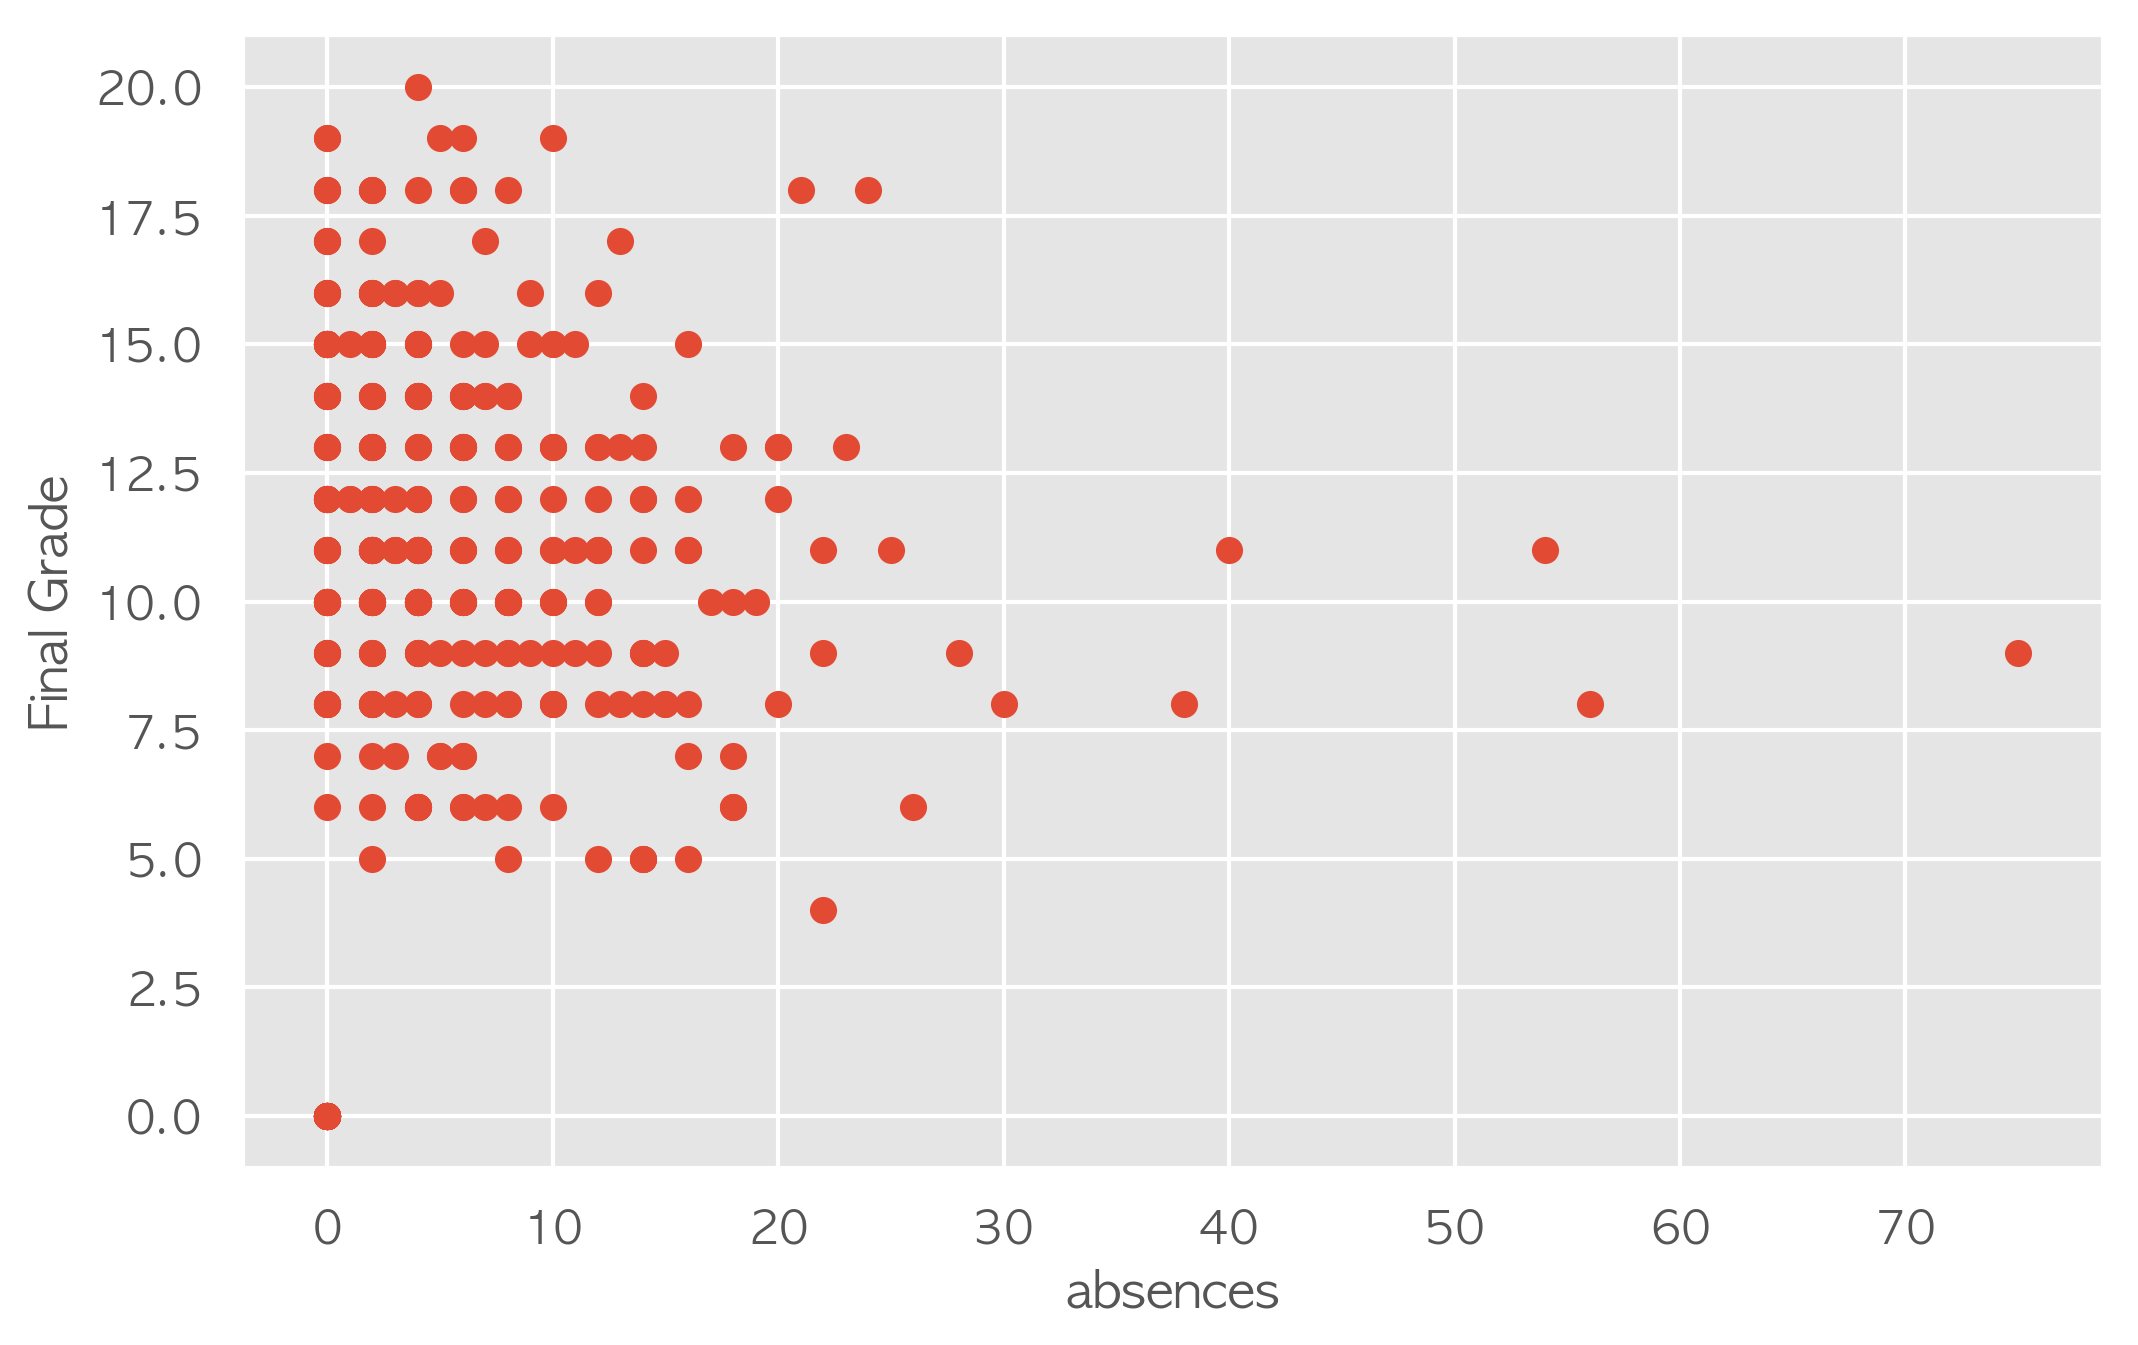

In [40]:
import matplotlib.pyplot as pyplot
style.use("ggplot") #grid looks like half-descent
p = "absences" #G1, G2, studytime, failures 
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final Grade")
pyplot.show()

# KNN(K Nearest Neighbors)

In [46]:
##KNN 
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model, preprocessing
data = pd.read_csv("/Users/JaeYoung/Downloads/Car Data Set/car.data", sep=",")
# pandas는 첫줄을 attribute로 인지하고 읽는다!!

In [51]:
data.tail()

,buying,maint,door,persons,lug_boot,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [52]:
#numerical value로 바꾸기
le = preprocessing.LabelEncoder()
buying =le.fit_transform(list(data["buying"])) #list로 넘겨주면 적절한 integer로 바꿔줌(vhigh를 3, low를 1=> 범주화해준다는 거임)
maint =le.fit_transform(list(data["maint"]))
door =le.fit_transform(list(data["door"]))
persons =le.fit_transform(list(data["persons"]))
lug_boot =le.fit_transform(list(data["lug_boot"]))
safety =le.fit_transform(list(data["safety"]))
cls =le.fit_transform(list(data["class"]))

In [58]:
predict = "class"
X = list(zip(buying, maint, door, persons, lug_boot, safety)) #zip은 튜플 묶음으로 만들기에
Y = list(cls)

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.1)

# 모든 데이터를 다 계산할 수 없다. 그래서 클러스터마다 중심을 두는 거임. 그거만 계산하게끔

In [73]:
model = KNeighborsClassifier(n_neighbors=9) #변수하나를 neighbor 개수로 받음
model.fit(x_train, y_train)
acc = model.score(x_test, y_test)
#물론 neighbors가 많을수록 acc가 높아지겠지만 어느정도 한계점이 있다.
predictions = model.predict(x_test)
names = ["unacc", "acc", "good", "vgood"]
for x in range(len(x_test)):
    print(names[predictions[x]], x_test[x], names[y_test[x]]) #prediction이 모델에서 나온예상, y_test가 실제 결과
    n = model.kneighbors([x_test[x]], 5, True)
    print(n)

good (1, 0, 2, 1, 2, 1) good
(array([[1., 1., 1., 1., 1.]]), array([[ 236, 1269, 1550,  296,  858]]))
good (3, 1, 0, 1, 1, 2) good
(array([[1., 1., 1., 1., 1.]]), array([[  13,  234,  692,  354, 1049]]))
good (1, 2, 0, 2, 1, 0) acc
(array([[1., 1., 1., 1., 1.]]), array([[  35, 1295,  414, 1112,  366]]))
good (2, 0, 3, 0, 1, 2) good
(array([[1., 1., 1., 1., 1.]]), array([[ 190,  192, 1311,  139,   37]]))
good (2, 3, 3, 0, 0, 0) good
(array([[1., 1., 1., 1., 1.]]), array([[ 415, 1350,  189, 1225,  544]]))
good (0, 3, 2, 2, 0, 1) good
(array([[1., 1., 1., 1., 1.]]), array([[ 788,  182,   16, 1039,  846]]))
good (2, 2, 2, 1, 2, 1) good
(array([[1., 1., 1., 1., 1.]]), array([[ 392,  444,  693, 1384, 1507]]))
good (2, 1, 2, 0, 0, 2) good
(array([[1., 1., 1., 1., 1.]]), array([[ 822,  201, 1467,  704,  173]]))
acc (1, 1, 1, 1, 0, 2) acc
(array([[1., 1., 1., 1., 1.]]), array([[ 757,  559,  237,  105, 1243]]))
good (3, 2, 2, 0, 2, 2) good
(array([[1., 1., 1., 1., 1.]]), array([[ 312,  193, 1453

(array([[1., 1., 1., 1., 1.]]), array([[ 847, 1278,  440,  717,  923]]))
good (0, 0, 2, 1, 0, 1) good
(array([[1., 1., 1., 1., 1.]]), array([[ 541,  382,  907, 1103, 1011]]))
good (1, 3, 2, 0, 0, 1) good
(array([[1., 1., 1., 1., 1.]]), array([[1156,  451,  567, 1037,  942]]))
good (0, 3, 0, 0, 1, 0) good
(array([[1., 1., 1., 1., 1.]]), array([[  55, 1392,  931, 1284, 1115]]))
good (0, 3, 3, 1, 0, 1) good
(array([[1., 1., 1., 1., 1.]]), array([[362, 475, 588, 788, 148]]))
good (2, 0, 2, 0, 2, 1) good
(array([[1., 1., 1., 1., 1.]]), array([[ 296, 1494, 1372, 1113,  975]]))
good (1, 2, 0, 0, 0, 0) good
(array([[1., 1., 1., 1., 1.]]), array([[ 357, 1175, 1093, 1552,  294]]))
good (2, 2, 2, 0, 1, 2) good
(array([[1., 1., 1., 1., 1.]]), array([[1055, 1524,  822,  471,  526]]))
good (3, 2, 0, 1, 0, 1) good
(array([[1., 1., 1., 1., 1.]]), array([[662, 279, 546, 443, 103]]))
good (3, 1, 2, 1, 2, 2) good
(array([[1., 1., 1., 1., 1.]]), array([[ 754,  742,  193, 1307, 1471]]))
good (2, 3, 1, 0, 0

# Support Vector Machines


In [75]:
import sklearn
from sklearn import datasets
from sklearn import svm

cancer = datasets.load_breast_cancer() #datasets.~~ 중에 아무거나 고르면됨

print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [76]:
X = cancer.data
Y = cancer.target

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2)
print(x_train, y_train)
classes = ['malignant', 'benign']


[[1.530e+01 2.527e+01 1.024e+02 ... 2.024e-01 4.027e-01 9.876e-02]
 [1.162e+01 1.818e+01 7.638e+01 ... 1.416e-01 2.660e-01 9.270e-02]
 [1.169e+01 2.444e+01 7.637e+01 ... 1.308e-01 2.803e-01 9.970e-02]
 ...
 [1.390e+01 1.924e+01 8.873e+01 ... 8.150e-02 2.356e-01 7.603e-02]
 [1.607e+01 1.965e+01 1.041e+02 ... 1.520e-01 2.650e-01 6.387e-02]
 [1.727e+01 2.542e+01 1.124e+02 ... 1.739e-01 2.500e-01 7.944e-02]] [0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1
 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1
 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 

# SVM

In [1]:
import sklearn
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

cancer = datasets.load_breast_cancer()

X = cancer.data
Y = cancer.target

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2)

classes = ['malignant', 'benign']

In [2]:
clf = svm.SVC() #support vector classification
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred) #1번째 실제결과, 2번째 예측결과
# 아직까진 글케 높지 않음(54%라니)

0.543859649122807

In [3]:
clf = svm.SVC(kernel = "linear")
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred) #1번째 실제결과, 2번째 예측결과
#kernel linear만 추가했는데도 95%됨, poly로 하면 좀 오래기다려야함!!, degree=2추가해도

0.956140350877193

In [4]:
clf = svm.SVC(kernel="linear", C=2) #C=0이면 hard margin 1이상이면 soft margin으로감
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred) #1번째 실제결과, 2번째 예측결과

0.956140350877193

In [5]:
#KNN과 비교
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred) #1번째 실제결과, 2번째 예측결과
#93% 나왔으니 SVM>KNN이넹!!!

0.9385964912280702

# K Means

In [ ]:
# k mean은 일일이 해줘야될 필요가 있다. digit이 얼마인지 각각 입력해줘야함
# average를 통해 클러스터의 중심을 설정!!
# 클러스터 중심에 따라 가까운 데이터가 바꼈을수도 있으니 그럴경우 속성을 바꿔줌
# 변화가 없을때까지 반복!!!
import sklearn
from sklearn.preprocessing import scale
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn import metrics

digits = load_digits()
data = scale(digits.data) #all of our feature scale down -1, 1로 바꿔줌
y = digits.targets

k = 10 # 10digits
samples, features = data.shape #(121, 232)이런거처럼

def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

#test data를 따로 나눠서 줄 필요없음
clf = KMeans(n_cluster=k, init="random", n_init=10) #centroid, 클러스터설정, 반복
bench_k_means(clf, "1", data)